# This notebook is used to produce the figures in the publication. 

In [1]:
import mpl_toolkits.mplot3d.art3d as art3d
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.transform import Rotation as R
import json
import os,glob
from pathlib import Path
from os.path import join
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, MaxNLocator
import matplotlib.ticker as ticker

In [2]:
# In academic, "Arial""Times"font are prefered.
mpl.rcParams['font.family'] = 'DeJavu Serif'
mpl.rcParams['font.serif'] = ['Times New Roman']

In [3]:
def get_all_points_in_one_image_WCS(json_file):
    """
    read in local 2D dislocation data on the slip plane. 
    """
    with open(json_file, "r") as json_data:
        data = json.load(json_data)  
        Xs = data.get('Xs_3D_WCS')
        Ys = data.get('Ys_3D_WCS')
        Zs = data.get('Zs_3D_WCS')
    return Xs, Ys, Zs

In [4]:
def get_all_points_in_one_image_LCS(json_file):
    """
    read in local 2D dislocation data on the slip plane. 
    """
    with open(json_file, "r") as json_data:
        data = json.load(json_data)  
        Xs = data.get('Xs_3D_LCS')
        Ys = data.get('Ys_3D_LCS')
    return Xs, Ys

def get_V_P(json_file):
    with open(json_file, "r") as json_data:
        data = json.load(json_data)  
        V0 = data.get('V0')
        V1 = data.get('V1')
        V2 = data.get('V2')
        P1 = data.get('P1')
        P2 = data.get('P2')
#     print(np.shape(pins_x))
    return V0, V1, V2, P1, P2

In [5]:
base_path = Path.cwd()
fig3_path = join(base_path, 'figure-3')
fig4_path = join(base_path, 'figure-4')
fig5_path = join(base_path, 'figure-5')
fig6_path = join(base_path, 'figure-6')

## Figure 3b -- Frame 0561 distribution in world coordinate system

In [6]:
filename3b = glob.glob(join(fig3_path, 'frame*-data_glide_plane_WCS.json'))
for fig3b in filename3b:
    G3d_Xs, G3d_Ys, G3d_Zs = get_all_points_in_one_image_WCS(fig3b)

In [7]:
ref_file = glob.glob(join(fig3_path, 'ref_file.json'))
for ref_json in ref_file:
    V0, V1, V2, P1, P2 = get_V_P(ref_json)

<IPython.core.display.Javascript object>


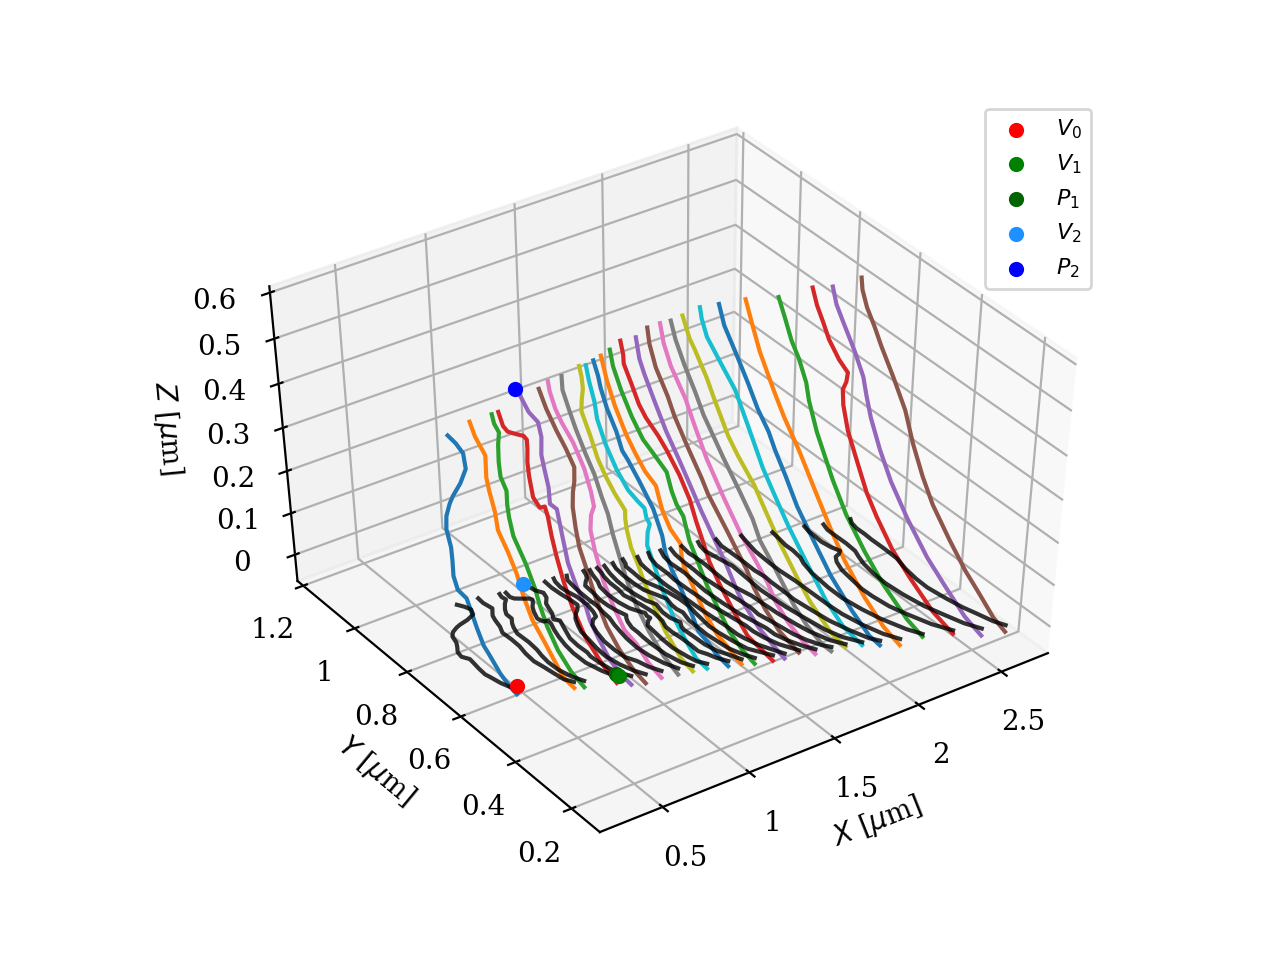

In [8]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(elev=45., azim=-125)
for i in range(len(G3d_Xs)):
    ax.plot3D(G3d_Xs[i], G3d_Ys[i], G3d_Zs[i])
    ax.plot3D(G3d_Xs[i], G3d_Ys[i], 0, 'k', alpha=0.8)

ax.scatter(V0[0], V0[1], V0[2], label=r'$V_{0}$', color='r')
ax.scatter(V1[0], V1[1], V1[2], label=r'$V_{1}$', color='g')
ax.scatter(P1[0], P1[1], P1[2], label=r'$P_{1}$', color='darkgreen')

ax.scatter(V2[0], V2[1], V2[2], label=r'$V_{2}$', color='dodgerblue')
ax.scatter(P2[0], P2[1], P2[2], label=r'$P_{2}$', color='b')



ax.set_xticks([500, 1000, 1500, 2000, 2500])
ax.set_yticks([200, 400, 600, 800, 1000, 1200])
ax.set_zticks([0, 100, 200, 300, 400, 500, 600])
ax.set_xlabel("$X$ [$\mu$m]")#, fontsize=10)
ax.set_ylabel("$Y$ [$\mu$m]")
ax.set_zlabel("$Z$ [$\mu$m]",rotation=90)

# # Change ax
scale = 1e3
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(y/scale))
ax.yaxis.set_major_formatter(ticks_y)
ticks_z = ticker.FuncFormatter(lambda z, pos: '{0:g}'.format(z/scale))
ax.zaxis.set_major_formatter(ticks_z)

ax.legend(loc='lower right',fontsize=8, bbox_to_anchor=(0.95, 0.75))

#plt.savefig("output/Fig3b_data_in_3D_WCS.png", dpi=300, bbox_inches = "tight")

## Figure 3c -- Frame 0561 distribution on glide plane

In [9]:
filename3c = glob.glob(join(fig3_path, 'frame*-data_glide_plane_LCS.json'))
for fig3c in filename3c:
    L2d_Xs, L2d_Ys = get_all_points_in_one_image_LCS(fig3c)

In [10]:
# read in local 2D dislocation data on the slip plane. 
def get_bt_lcs(json_file):
    with open(json_file, "r") as json_data:
        data = json.load(json_data)  
        b_lcs = data.get('b_lcs')
        t_lcs = data.get('t_lcs')
#     print(np.shape(pins_x))
    return b_lcs, t_lcs

def get_slip_trace(json_file):
    with open(json_file, "r") as json_data:
        data = json.load(json_data)  
        slip_trace = data.get('slip_trace_lower_mb_and_upper_mb')
    return slip_trace

    
rbt_file = glob.glob(join(fig3_path, 'rbt_file.json'))
for rbt_json in rbt_file:
    b_lcs, t_lcs = get_bt_lcs(rbt_json)
    
k_file = glob.glob(join(fig3_path, 'k_file.json'))
for k_json in k_file:
    slip_trace = get_slip_trace(k_json)
    
b_lcs = np.array(b_lcs)
t_lcs = np.array(t_lcs)
slip_trace = np.asarray(slip_trace)

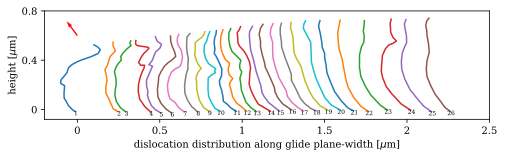

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
fig, ax = plt.subplots(figsize=(8,2))
ax.set(xlabel="dislocation distribution along glide plane-width [$\mu$m]", ylabel='height [$\mu$m]')
for i in range(len(L2d_Xs)):
    ax.plot(L2d_Xs[i], L2d_Ys[i], markersize=1.2)  
    ax.annotate(f'{i+1}', (L2d_Xs[i][0]+5, L2d_Ys[i][0]-40), fontsize=6, ha='center', va='bottom')
     

ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(y/scale))
ax.yaxis.set_major_formatter(ticks_y)

ax.set_xticks([0, 500, 1000, 1500, 2000, 2500])
ax.set_yticks([0, 400, 800])
ax.set_xlim(-200,2500)
ax.set_ylim(-80,800)

V = np.array([[b_lcs[0], b_lcs[1]]])
origin = np.array([[0],[600]]) # origin point
ax.quiver(*origin, V[:,0], V[:,1], color=['r'], scale=25, width=0.003)

## Figure 4 -- distance & force distribution

In [12]:
# find out the current working directory

filename_KDP = glob.glob(os.path.join(fig4_path, 'KDP*.json'))
filename_AFP = glob.glob(os.path.join(fig4_path, 'AFP*.json'))
AFP_data_all = []
KDP_data_all = []
for KDP_file, AFP_file in zip(sorted(filename_KDP), sorted(filename_AFP)):
    with open(AFP_file) as f1:
        AFP_data = json.load(f1)
        AFP_data_all.append(AFP_data)
    with open(KDP_file) as g1:
        KDP_data = json.load(g1)
        KDP_data_all.append(KDP_data)

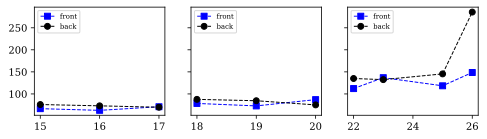

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(8, 2), sharey=True)
for count, (AFP_data, KDP_data) in enumerate(zip(AFP_data_all, KDP_data_all)):
    str_P = AFP_data['str_P']
    list_Fs = AFP_data['list_Fs']
    list_As = AFP_data['list_As']
    list_Ps = AFP_data['list_Ps']
    uniq = AFP_data['uniq']
    list_ds_former = AFP_data['list_ds_former']
    list_ds_latter = AFP_data['list_ds_latter']
    
    axs[count].plot(uniq, [np.mean(d_f) for d_f in list_ds_former], '--bs', linewidth=1, label='front')
    axs[count].plot(uniq, [np.mean(d_l) for d_l in list_ds_latter], '--ko', linewidth=1, label='back')
    axs[count].legend(loc='upper left', fontsize='x-small')


#     fig.savefig(f'output/distance.svg', format='svg', dpi=1200, bbox_inches = "tight")

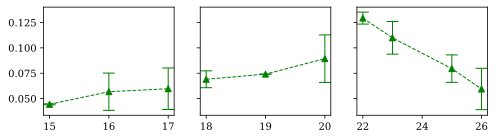

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(8, 2), sharey=True)
for count, (AFP_data, KDP_data) in enumerate(zip(AFP_data_all, KDP_data_all)):
    str_P = AFP_data['str_P']
    list_Fs = AFP_data['list_Fs']
    list_As = AFP_data['list_As']
    list_Ps = AFP_data['list_Ps']
    uniq = AFP_data['uniq']
    
    f_Kmax_xs_global = KDP_data['f_Kmax_xs_global']
    f_Kmax_ys_global = KDP_data['f_Kmax_ys_global']
    f_Dmin_xs_global = KDP_data['f_Dmin_xs_global']  
    f_Dmin_ys_global = KDP_data['f_Dmin_ys_global']
    f_pins_x = KDP_data['f_pins_x']
    f_pins_y = KDP_data['f_pins_y']

    axs[count].errorbar(uniq, [np.mean(force) for force in list_Fs], [np.std(force) for force in list_Fs], fmt='--g^', linewidth=1, capsize=6)

#     fig.savefig(f'output/Force.svg', format='svg', dpi=1200, bbox_inches = "tight")

## Figure 5 -- Coarse graining result of frame 0561 

In [15]:
import cv2
from mpl_toolkits import axes_grid1

In [16]:
def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs), cax

#this works for data structure with labelme app
def get_all_points_in_one_image_labelme(json_file):
    
    with open(json_file, "r") as json_data:
        data = json.load(json_data)  
        shape = data.get('shapes') 
        image_height = data.get('imageHeight')  #this value may change for different images 
        
        all_lines_in_one_image = []
        all_points_in_one_image = []
        
        for i in range(len(shape)):
            line = shape[i]
            points = line.get('points')
            all_lines_in_one_image.append(line)
            all_points_in_one_image.append(points)

        all_xs_in_one_image = []
        all_ys_in_one_image = []
        
        #for ith_line_points in all_points_in_one_image: #range(len(9,
        for n_line in range(len(all_points_in_one_image)):
            ith_line_points = all_points_in_one_image[n_line]
            xs = []
            ys = []
            
            for m_point in range(len(ith_line_points)):
                x = ith_line_points[m_point][0]
                y = image_height - ith_line_points[m_point][1]
                xs.append(x)
                ys.append(y)
                
            all_xs_in_one_image.append(xs)
            all_ys_in_one_image.append(ys)
            
    return all_xs_in_one_image, all_ys_in_one_image


# find out the current working directory
filenames = glob.glob(join(fig5_path, 'frame*.json'))
filenames.sort()


################
image_height = 400.0

canvas_x_min = -600
canvas_x_max = 3000
canvas_y_min = -100
canvas_y_max = 900

voxel_x_size = 15
voxel_y_size = 15

x_1D_arrays = np.arange(canvas_x_min, canvas_x_max + 0.5 * voxel_x_size, voxel_x_size)
y_1D_arrays = np.arange(canvas_y_min, canvas_y_max + 0.5 * voxel_y_size, voxel_y_size)

xx, yy = np.meshgrid(x_1D_arrays, y_1D_arrays)

pins_x = [1189, 1420, 1940]
pins_y = [553, 550, 566]

In [17]:
def plot_figure(frame_number):
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8,9))
    image1 = cv2.imread(f'{fig5_path}/frame{frame_number}.png')

    ax1.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
   
    xs, ys = get_all_points_in_one_image_labelme(f'{fig5_path}/frame{frame_number}.json')

    for i in range(len(xs)):
        #X, Y = np.array(xs[i]) - offset[1], np.array(ys[i]) + offset[0]
        X, Y = np.array(xs[i]), np.array(ys[i])
        xs_line = np.array(X)
        ys_line = image_height - np.array(Y)
        ax1.plot(xs_line, ys_line, lw=1, c='r')
        ax1.annotate(f'{i+1}\n', (xs_line[0], ys_line[0]+10), fontsize=5, ha='center', va='bottom')
        
    k_filename = glob.glob(join(fig5_path, f'curvature-frame{frame_number}_voxelsize-{voxel_x_size}*.txt'))
    v_filename = glob.glob(join(fig5_path, f'velocity-frame{frame_number}_voxelsize-{voxel_x_size}*.txt'))
    # The velocity is the data of the previous frame moving to this speific frame
    for k_file, v_file in zip(k_filename, v_filename):
        cg_k = np.loadtxt(k_file)#, delimiter=' ')    
        cg_v = np.loadtxt(v_file)
    # shift everything such that 0,0 is the lower left corner
    
    c1 = ax2.pcolor(xx, yy, cg_k, cmap='RdBu_r', vmin=-0.007, vmax=0.007, linewidth=0,rasterized=True)
    ax2.scatter(pins_x, pins_y, marker='s', label='pinning point', edgecolors='cyan', facecolors='none',lw=1, s=60)
    ax2.set_title(r'coarse grained curvature in local slip plane $\langle k\rangle$   [1/nm]')#,vmin=-0.05, vmax=0.05
    ax2.set_aspect('equal')
    ax2.legend(facecolor='none', edgecolor='none')
    plot1, cax1 = add_colorbar(c1, pad_fraction=1, aspect=10)
    cax1.set_xlabel(r"$\kappa$ [$\mathrm{nm^{-1}}$]", labelpad=-150, rotation=360)

    c2 = ax3.pcolor(xx, yy, cg_v, cmap='RdBu_r', vmin=0, vmax=np.mean(cg_v[cg_v!=0]), linewidth=0, rasterized=True)#, alpha=1, antialiased=True)
    ax3.scatter(pins_x, pins_y, marker='s', label='pinning point', edgecolors='cyan', facecolors='none',lw=1, s=50)
    ax3.set_title(r'coarse grained velocity in local slip plane $\langle v\rangle$   [nm/s]')
    ax3.set_aspect('equal')
    leg = ax3.legend(facecolor='none', edgecolor='none')
    for text in leg.get_texts():
        text.set_color("white")
    plot2, cax2 = add_colorbar(c2, pad_fraction=1, aspect=10)
    cax2.set_xlabel(r'$v$ [$\mathrm{nm/s}$]', labelpad=-150, rotation=360)

    ax1.set(xticks=[], yticks=[], title="original image (projected into plane)")
    ax2.set(yticks=np.arange(0, 801, 400), 
                  yticklabels=[f"{s/1000:5.1f}" for s in np.arange(0, 801, 400)], 
                  xticks=np.arange(0, 3000, 500), xticklabels=[], ylabel="local y coordinate [µm]")
    ax3.set(xlabel="local x coordinate [µm]", ylabel="local y coordinate [µm]",
                  xticks=np.arange(0, 3000, 500), xticklabels=[f"{s/1000:5.1f}" for s in np.arange(0, 3000, 500)],
                  yticks=np.arange(0, 801, 400), yticklabels=[f"{s/1000:5.1f}" for s in np.arange(0, 801, 400)])
    ax2.tick_params(axis='y', labelrotation=90)
    ax3.tick_params(axis='y', labelrotation=90)
    fig.tight_layout()
    #fig.savefig(f'output/Fig3_single_K_V.svg', format='svg', dpi=1200, bbox_inches = "tight")

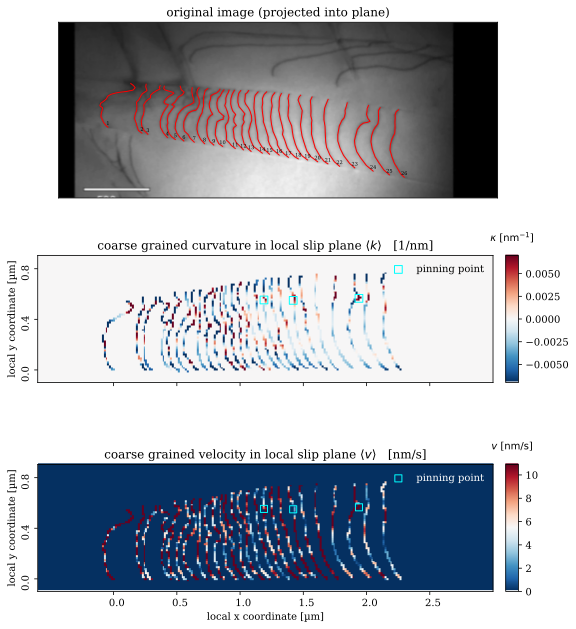

In [18]:
frame_number = str('0561')
plot_figure(frame_number)

## Figure 6 -- Weighted averaging of curvature and velocity based on 303 images

In [19]:
import matplotlib.ticker as ticker
from matplotlib import gridspec
import warnings
warnings.filterwarnings('ignore')

In [20]:
k_path = join(fig6_path,'cg_curvature')
q_path = join(fig6_path,'cg_curvature_density')
rhok_path = join(fig6_path,'cg_density_k')

v_path = join(fig6_path,'cg_velocity')
vr_path = join(fig6_path,'cg_velocity_density')

canvas_x_min, canvas_x_max = -600, 3000
canvas_y_min, canvas_y_max = -100, 900

voxel_x_size_range = [15]#
voxel_y_size_range = [15]

cg_k_range = []
cg_q_range = []
cg_rhok_range = []
cg_v_range = []
cg_vr_range = []

xx_range = []
yy_range = []

for voxel_x_size, voxel_y_size in zip(voxel_x_size_range, voxel_y_size_range):
    x_1D_arrays = np.arange(canvas_x_min, canvas_x_max + 0.5 * voxel_x_size, voxel_x_size)
    y_1D_arrays = np.arange(canvas_y_min, canvas_y_max + 0.5 * voxel_y_size, voxel_y_size)
    xx, yy = np.meshgrid(x_1D_arrays, y_1D_arrays)
    xx_range.append(xx)
    yy_range.append(yy)
    
    
    k_filename = glob.glob(join(k_path, f'cg_k_{voxel_x_size}*.txt'))
    q_filename = glob.glob(join(q_path, f'cg_q_{voxel_x_size}*.txt'))
    rhok_filename = glob.glob(join(rhok_path, f'cg_rho_{voxel_x_size}*.txt'))
    
    v_filename = glob.glob(join(v_path, f'cg_v_{voxel_x_size}*.txt'))
    vr_filename = glob.glob(join(vr_path, f'cg_vr_{voxel_x_size}*.txt'))

    cg_k = np.loadtxt(k_filename[0])  
    cg_q = np.loadtxt(q_filename[0])
    cg_rhok = np.loadtxt(rhok_filename[0])
    cg_v = np.loadtxt(v_filename[0])
    cg_vr = np.loadtxt(vr_filename[0])
     
    
    cg_k_range.append(cg_k)
    cg_q_range.append(cg_q)
    cg_rhok_range.append(cg_rhok)
    cg_v_range.append(cg_v)
    cg_vr_range.append(cg_vr)

In [21]:
# sub region of the original image
sub_region_1_k = [1000, 1250, 200, 400]
sub_region_2_k = [1450, 1650, 430, 530]
sub_region_3_k = [1750, 1850, 500, 650]
sub_regions_k = [sub_region_1_k,sub_region_2_k, sub_region_3_k]

bounds_1 = [0.1, 1.1, 0.3, 0.3]
bounds_2 = [0.3, 1.1, 0.3, 0.3]
bounds_3 = [0.5, 1.1, 0.3, 0.3]
sub_bounds = [bounds_1, bounds_2, bounds_3]


# sub region of the original image
sub_region_1_v = [1140, 1240, 500, 600]
sub_region_2_v = [1350, 1450, 500, 600]
sub_region_3_v = [1900, 2000, 520, 620]
sub_regions_v = [sub_region_1_v,sub_region_2_v, sub_region_3_v]

cg_q_y_axis = np.nanmean(np.where(cg_q>0, cg_q, np.nan),axis=0)
cg_rho_y_axis = np.nanmean(np.where(cg_rhok!=0, cg_rhok, np.nan),axis=0)
cg_k_verify_y_axis = np.divide(cg_q_y_axis, cg_rho_y_axis, out=np.zeros(cg_q_y_axis.shape, dtype=float), where=cg_rho_y_axis!=0)
x_1D_arrays = np.arange(canvas_x_min, canvas_x_max + 0.5 * voxel_x_size, voxel_x_size)
k1 = cg_k_verify_y_axis # column non-zero(only positive) average
x_1D_arrays = np.arange(canvas_x_min, canvas_x_max + 0.5 * voxel_x_size, voxel_x_size)
v1 = np.nanmean(np.where(cg_v!=0, cg_v, np.nan),0) # column non-zero(only positive) average

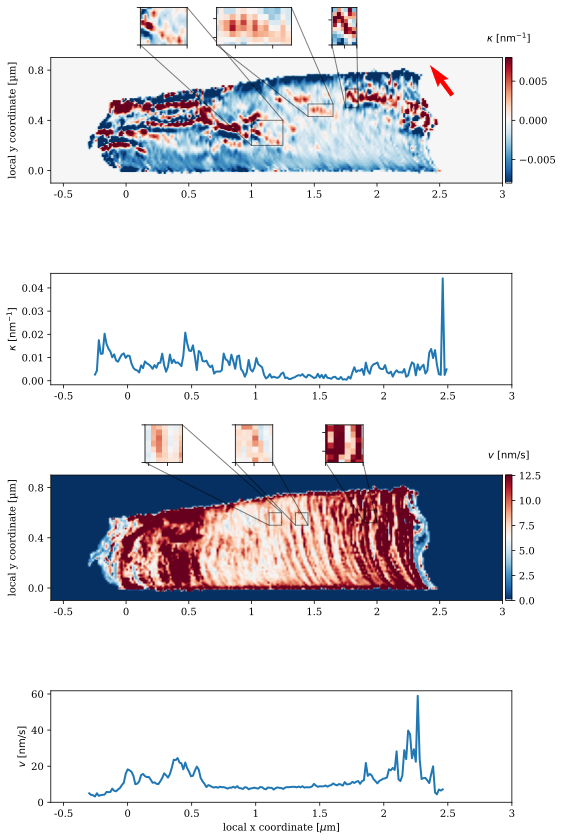

In [22]:
fig = plt.figure(figsize=(8, 12), constrained_layout=True) 
gs = gridspec.GridSpec(4, 1, height_ratios=(4, 2, 4, 2))

ax4 = fig.add_subplot(gs[3, 0])
ax = fig.add_subplot(gs[0, 0], sharex=ax4)
ax2 = fig.add_subplot(gs[1, 0], sharex=ax4)
ax3 = fig.add_subplot(gs[2, 0], sharex=ax4)

for cg_k, cg_v, xx, yy, voxel_x_size in zip(cg_k_range, cg_v_range, xx_range, yy_range, voxel_x_size_range):
    
    #------------------------------------K plot------------------------------------------------------------# 
    # make data
    Z, extent = cg_k, (canvas_x_min, canvas_x_max, canvas_y_min, canvas_y_max)
    Z2 = np.zeros_like(cg_k)#ny=50, nx=150
    ny, nx = Z.shape
    Z2[0:0+ny, 0:0+nx] = Z

    c1 = ax.imshow(Z2, cmap='RdBu_r', vmin=-0.008, vmax=0.008, extent=extent,origin="lower")
    plot1, cax1 = add_colorbar(c1)
    cax1.set_xlabel(r"$\kappa$ [$\mathrm{nm^{-1}}$]", labelpad=-150, rotation=360)  # cax == cb.ax
    
    ax.set(ylabel="local y coordinate [µm]",
           xticks=np.arange(0, 3000, 500), xticklabels=[f"{s/1000:5.1f}" for s in np.arange(0, 3000, 500)],
           yticks=np.arange(0, 801, 400), yticklabels=[f"{s/1000:5.1f}" for s in np.arange(0, 801, 400)])
    ax.quiver([2600],[600], b_lcs[0], b_lcs[1], scale=12, width=0.01, color='red')
    # inset axes....
    #bounds[x0, y0, width, height]
    #Lower-left corner of inset Axes, and its width and height.
    for bound, sub_region in zip(sub_bounds, sub_regions_k):
        axins = ax.inset_axes(bound)
        c2 = axins.imshow(Z2, cmap='RdBu_r', vmin=-0.008, vmax=0.008, extent=extent, origin="lower")
        # sub region of the original image
        x1, x2, y1, y2 = sub_region[0], sub_region[1], sub_region[2], sub_region[3]
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)
        axins.set_xticklabels('')
        axins.set_yticklabels('')
        ax.indicate_inset_zoom(axins, edgecolor="black")
        
    ax2.plot(x_1D_arrays[:-1], k1,lw=2)
    ax2.set_ylabel("$\kappa$ [$\mathrm{nm^{-1}}$]")

    scale = 1e3
    ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale))
    ax2.xaxis.set_major_formatter(ticks_x)
    
    #------------------------------------V plot------------------------------------------------------------#   
    # make data
    Z_v, extent_v = cg_v, (canvas_x_min, canvas_x_max, canvas_y_min, canvas_y_max)
    Z2_v = np.zeros_like(cg_v)#ny=50, nx=150
    ny_v, nx_v = Z_v.shape
    Z2_v[0:0+ny_v, 0:0+nx_v] = Z_v

    c1_v = ax3.imshow(Z2_v, cmap='RdBu_r', vmin=0, vmax=np.mean(cg_v[cg_v!=0]), extent=extent_v,origin="lower")
    plot2, cax2 = add_colorbar(c1_v)
    cax2.set_xlabel(r'$v$ [$\mathrm{nm/s}$]', labelpad=-150, rotation=360)
    
    ax3.set(ylabel="local y coordinate [µm]",
            xticks=np.arange(0, 3000, 500), xticklabels=[f"{s/1000:5.1f}" for s in np.arange(0, 3000, 500)],
            yticks=np.arange(0, 801, 400), yticklabels=[f"{s/1000:5.1f}" for s in np.arange(0, 801, 400)])
    # inset axes....
    for bound, sub_region in zip(sub_bounds, sub_regions_v):
        axins2 = ax3.inset_axes(bound)#
        c2_v = axins2.imshow(Z2_v, cmap='RdBu_r', vmin=0, vmax=np.mean(cg_v[cg_v!=0]), extent=extent_v, origin="lower")
        # sub region of the original image
        x1, x2, y1, y2 = sub_region[0], sub_region[1], sub_region[2], sub_region[3]
        axins2.set_xlim(x1, x2)
        axins2.set_ylim(y1, y2)
        axins2.set_xticklabels('')
        axins2.set_yticklabels('')

        ax3.indicate_inset_zoom(axins2, edgecolor="black")    

    ax4.plot(x_1D_arrays[:-1], v1, lw=2)
    ax4.xaxis.set_major_formatter(ticks_x)
    ax4.set_xticks(np.arange(-500, 3250, 500))
    ax4.set_yticks([0.0, 20, 40, 60])
    ax4.set_xlabel("local x coordinate [$\mu$m]")#, fontsize=10)
    ax4.set_ylabel("$v$ [$\mathrm{nm/s}$]")
    plt.tight_layout()